# Baseline CNN Model for American Sign Language Classification

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers

### Part One: Data Loader

In [4]:
dict_labels = {
    '0':1, '1':2, '2':3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10,
    'a':11, 'b':12, 'c':13, 'd':14, 'e':15, 'f':16, 'g':17, 'h':18, 'i':19,
    'j':20, 'k':21, 'l':22, 'm':23, 'n':24, 'o':25, 'p':26, 'q':27, 'r':28,
    's':29, 't':30, 'u':31, 'v':32, 'w':33, 'x':34, 'y':35, 'z':36, 
}
img_size = 50

#### Big data (400\*400)

In [5]:
# train set
xb = []
yb = []
path = 'Data/asl/train_asl/'
gestures = os.listdir(path)[1:]

for ix in gestures:
    images = os.listdir(path +ix)
    for cx in images:
        img_path = path+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (img_size,img_size), interpolation = cv2.INTER_AREA) 

        xb.append(img)
        yb.append(dict_labels[ix])

In [6]:
Yb = to_categorical(np.array(yb))
Xb = np.array(xb)/255.0 # normalization

In [7]:
# test set
xb_test = []
yb_test = []
path_test = 'Data/asl/test_asl/'
gestures_test = os.listdir(path_test)[1:]

for ix in gestures_test:
    images = os.listdir(path_test +ix)
    for cx in images:
        img_path = path_test+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (img_size,img_size), interpolation = cv2.INTER_AREA) 

        xb_test.append(img)
        yb_test.append(dict_labels[ix])

In [8]:
Yb_test = to_categorical(np.array(yb_test))
Xb_test = np.array(xb_test)/255.0   # normalization     

In [9]:
# split train data into train set and validation set
Xb_train, Xb_val, Yb_train, Yb_val = train_test_split(Xb, Yb, test_size=0.2,shuffle=True)

### Part Two: Build the CNN Model 
Referencing the CNN model described in the [Using Deep Convolutional Networks for Gesture Recognition in American Sign Language](https://arxiv.org/pdf/1710.06836.pdf) paper.

In [10]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(37, activation='softmax')
    ]
)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
history = model.fit(Xb_train, Yb_train, batch_size=32, epochs=100, validation_data = (Xb_val,Yb_val))

Epoch 1/100
506/506 [==============================] - 120s 233ms/step - loss: 2.5737 - accuracy: 0.2205 - val_loss: 1.3111 - val_accuracy: 0.5757
Epoch 2/100
506/506 [==============================] - 124s 245ms/step - loss: 1.2024 - accuracy: 0.5763 - val_loss: 0.5280 - val_accuracy: 0.8123
Epoch 3/100
506/506 [==============================] - 109s 215ms/step - loss: 0.7672 - accuracy: 0.7107 - val_loss: 0.4198 - val_accuracy: 0.8333
Epoch 4/100
506/506 [==============================] - 83s 164ms/step - loss: 0.5700 - accuracy: 0.7726 - val_loss: 0.2775 - val_accuracy: 0.8895
Epoch 5/100
506/506 [==============================] - 89s 176ms/step - loss: 0.4673 - accuracy: 0.8157 - val_loss: 0.2293 - val_accuracy: 0.9045
Epoch 6/100
506/506 [==============================] - 92s 183ms/step - loss: 0.4128 - accuracy: 0.8343 - val_loss: 0.2354 - val_accuracy: 0.8996
Epoch 7/100
506/506 [==============================] - 92s 182ms/step - loss: 0.3666 - accuracy: 0.8534 - val_loss: 0.186

Epoch 57/100
506/506 [==============================] - 84s 166ms/step - loss: 0.0566 - accuracy: 0.9798 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 58/100
506/506 [==============================] - 84s 166ms/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 59/100
506/506 [==============================] - 78s 155ms/step - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.0309 - val_accuracy: 0.9916
Epoch 60/100
506/506 [==============================] - 78s 154ms/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 61/100
506/506 [==============================] - 80s 158ms/step - loss: 0.0684 - accuracy: 0.9767 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 62/100
506/506 [==============================] - 79s 156ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0291 - val_accuracy: 0.9896
Epoch 63/100
506/506 [==============================] - 79s 156ms/step - loss: 0.0682 - accuracy: 0.9787 - val_loss: 0

In [13]:
model.save("dataset without aug")

INFO:tensorflow:Assets written to: dataset without aug/assets


In [15]:
import pickle
# save the history for plotting:
f = open('history_data_withoutaug.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [17]:
scores = model.evaluate(Xb_test, Yb_test)

159/159 [==============================] - 4s 26ms/step - loss: 0.0233 - accuracy: 0.9921


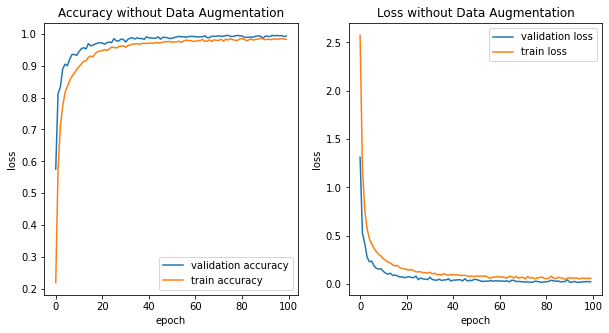

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
#Plot accuracy vs epoch
plt.subplot(121)
x = np.arange(0, 100, 1)
plt.plot(x, history.history['val_accuracy'],label='validation accuracy')
plt.plot(x, history.history['accuracy'],label='train accuracy')
plt.title("Accuracy without Data Augmentation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(x, history.history['val_loss'],label='validation loss')
plt.plot(x, history.history['loss'],label='train loss')
plt.title("Loss without Data Augmentation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
#### Fill in plot ####